In [184]:
import numpy as np
import matplotlib.pyplot as plt

In [185]:
X = np.array([
    [0.5],
    [1.0],
    [1.5],
    [2.0],
    [2.5],
    [3.0],
    [3.5],
    [4.0],
])
Y = np.array([0, 0, 1, 0, 0, 1, 1, 1])

In [186]:
theta = np.array([[0.1, 0.2],[0.3, 0.4]])
theta

array([[0.1, 0.2],
       [0.3, 0.4]])

In [187]:
x_b = np.hstack([np.ones((len(X), 1)), X])
x_b

array([[1. , 0.5],
       [1. , 1. ],
       [1. , 1.5],
       [1. , 2. ],
       [1. , 2.5],
       [1. , 3. ],
       [1. , 3.5],
       [1. , 4. ]])

#### truy cập từng hàng tương ứng từng cột theo mảng - mảng 
#### ví dụ : [0, 1, 2] - [0, 1, 0] = 1 : hàng 0 cọt 0 có gtri 1, hàng 1 cột 1 có giá trị 1 , hàng 2 cột 0 có giá trị 1

In [188]:
def one_hot_encoding(y,k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] =  1
    return one_hot

y_onehot =one_hot_encoding(Y,2)
y_onehot

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

#### cần keepdims để trở thành (8,1) lúc đó mới broadcasting để chia cho (8,2) được

In [189]:
def softmax_function(z):
    # print(np.exp(z).shape)
    # print(np.sum(np.exp(z), axis=1).shape)
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

#### với trường hợp batch thì kh cần transpose

In [190]:
def predict(x, theta):
    z = np.dot(x,theta)
    z = softmax_function(z)
    return z


y_hat = predict(x_b, theta)
y_hat

array([[0.46257015, 0.53742985],
       [0.450166  , 0.549834  ],
       [0.4378235 , 0.5621765 ],
       [0.42555748, 0.57444252],
       [0.41338242, 0.58661758],
       [0.40131234, 0.59868766],
       [0.38936077, 0.61063923],
       [0.37754067, 0.62245933]])

In [191]:
def compute_loss(y_hat, y):
    return -np.log(np.sum((y_hat*y), axis=1))

loss = compute_loss(y_hat, y_onehot)
print(loss)

[0.77095705 0.79813887 0.57593942 0.85435524 0.88338216 0.51301525
 0.49324895 0.47407698]


In [192]:
def compute_gradient(y_hat, y, x):
    return np.dot(x.T, (y_hat - y))

gradient = compute_gradient(y_hat, y_onehot, x_b)
gradient

array([[-0.64228666,  0.64228666],
       [ 1.29961972, -1.29961972]])

In [193]:
learning_rate = 0.01
def update_parameters(theta, lr, gradient):
    new_theta = theta -lr*gradient

    return new_theta


theta = update_parameters(theta, learning_rate, gradient)
theta

array([[0.10642287, 0.19357713],
       [0.2870038 , 0.4129962 ]])

In [194]:
theta = np.random.rand(2, 2)

learning_rate = 0.01
n_epochs = 500
n_samples = x_b.shape[0]

losses = []
for epoch in range(n_epochs):
    # compute z, y_hat
    y_hat = predict(x_b, theta)

    # compute loss
    loss = compute_loss(y_hat, y_onehot)
    losses.append(np.sum(loss))

    # compute gradient
    gradient = compute_gradient(y_hat, y_onehot, x_b)

    # update weight
    theta = update_parameters(theta, learning_rate, gradient)

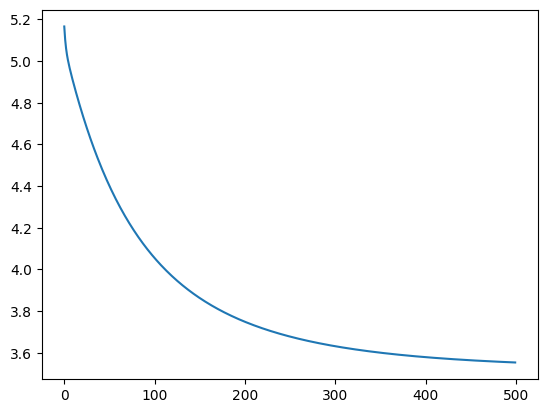

In [195]:
plt.plot(losses)
plt.show()